In [88]:
import bs3
import matplotlib.pyplot as plt
import numpy as np

In [97]:
dir = 'data'
csv = 'batch_test.csv'
rsz = 0.25 
min = 0
max = 999
fp  = 3

In [90]:
files = bs3.ls(dir)
len(files)

78

In [91]:
# Set image id to test
id = 4

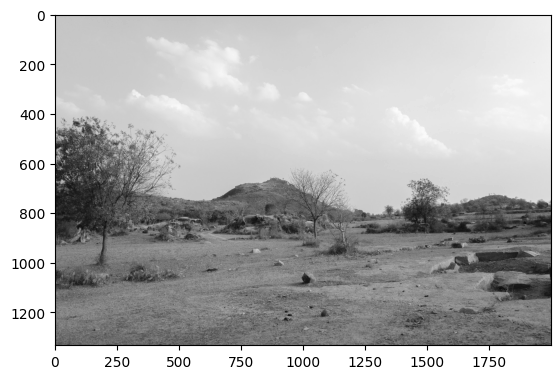

array([[184, 187, 188, ..., 226, 226, 226],
       [186, 187, 185, ..., 226, 226, 226],
       [184, 189, 188, ..., 226, 226, 226],
       ...,
       [ 52,  56,  50, ...,  86,  88,  94],
       [ 48,  54,  58, ...,  95, 102, 113],
       [ 60,  62,  62, ..., 108, 110, 102]], dtype=uint8)

In [92]:
img = bs3.read(dir, files[id])
bs3.preview(img)
img

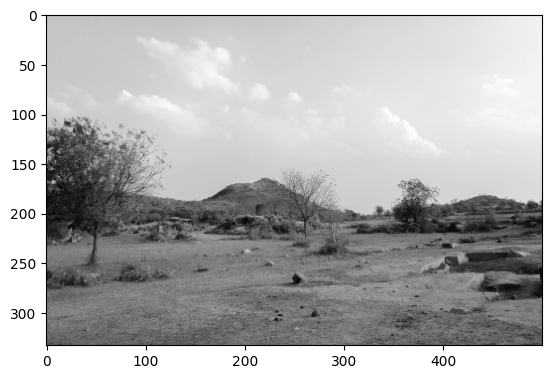

array([[187, 186, 186, ..., 226, 226, 226],
       [187, 186, 187, ..., 226, 226, 226],
       [187, 187, 186, ..., 226, 226, 226],
       ...,
       [101, 100, 105, ..., 107, 108,  92],
       [ 91, 102,  96, ...,  89,  93,  99],
       [ 56,  92, 100, ...,  86,  83,  98]], dtype=uint8)

In [93]:
img_rsz = bs3.resize(img, rsz)
h, w = img_rsz.shape
bs3.preview(img_rsz)
img_rsz

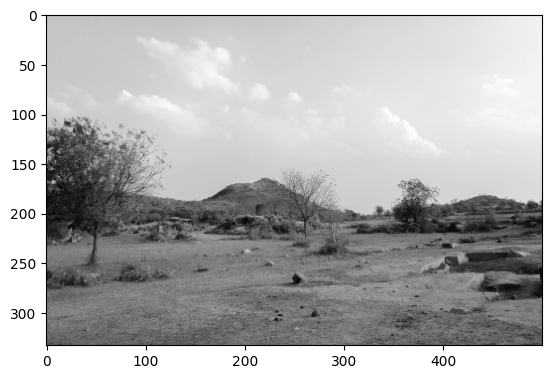

array([187., 186., 186., ...,  86.,  83.,  98.], dtype=float16)

In [94]:
img_np = bs3.as_np(img_rsz)
img_reshaped = img_np.reshape((h,w))
bs3.preview(img_reshaped)
img_np

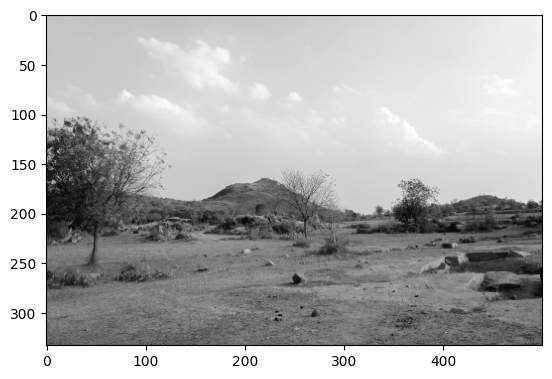

array([0.7856, 0.7817, 0.7817, ..., 0.3613, 0.3486, 0.4119], dtype=float16)

In [95]:
img_nrm = bs3.norm(img_np)
img_reshaped = img_nrm.reshape((h,w))
bs3.preview(img_reshaped)
img_nrm

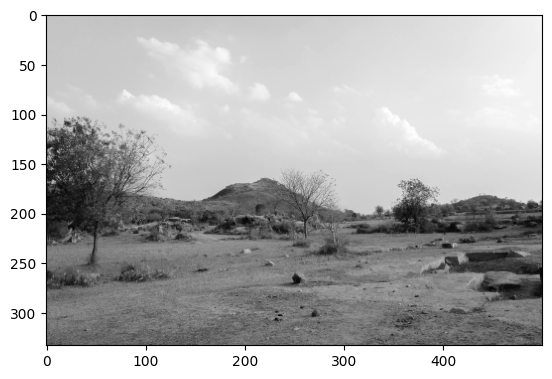

array([767.34017828, 763.11858699, 763.11858699, ..., 308.76982502,
       295.04965335, 363.38666226])

In [98]:
img_rmp = bs3.interp(img_nrm, min, max)
img_reshaped = img_rmp.reshape((h,w))
bs3.preview(img_reshaped, cmap='gray')
img_rmp

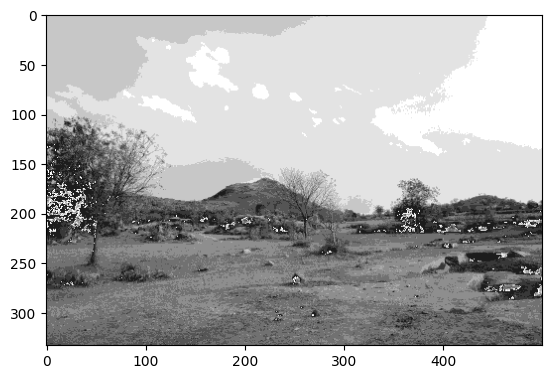

array([7, 7, 7, ..., 3, 2, 3])

In [99]:
img_fst = bs3.firsts(img_rmp)
img_reshaped = img_fst.reshape((h,w))
bs3.preview(img_reshaped)
img_fst

In [100]:
img_cnt = bs3.counts(img_fst)
img_cnt

{'1': 6416,
 '2': 8812,
 '3': 16406,
 '4': 29676,
 '5': 16582,
 '6': 2739,
 '7': 17656,
 '8': 52125,
 '9': 16085}

In [101]:
img_prb = bs3.probs(img_cnt)
img_prb

{'1': 3.8535228862982516,
 '2': 5.292587854435816,
 '3': 9.853630996354289,
 '4': 17.82374457197427,
 '5': 9.959338606701621,
 '6': 1.6450746860303789,
 '7': 10.604395274389327,
 '8': 31.306870394061153,
 '9': 9.66083472975489}

Text(0.5, 1.0, 'Image 4')

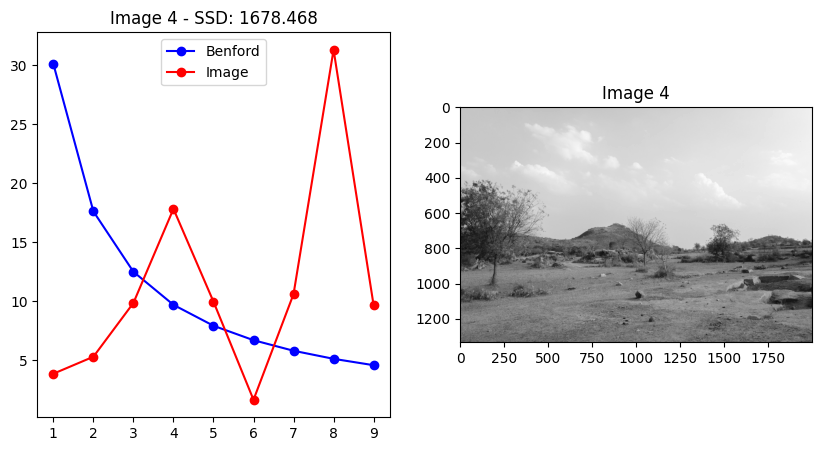

In [102]:
from numpy import size


ben = bs3.ben()
diff = { str(i) : round(img_prb[str(i)] - ben[str(i)], fp) for i in range(1, 10) }
sum_diff = sum(diff.values())

diff2 = { str(i) : pow(diff[str(i)], 2) for i in range(1, 10) }
sum_diff2 = sum(diff2.values())

# Show image and plot 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(ben.keys(), ben.values(), 'bo-', label='Benford')
ax[0].plot(img_prb.keys(), img_prb.values(), 'ro-', label='Image')
ax[0].legend()

ax[1].imshow(img, cmap='gray')

ax[0].set_title('Image {} - SSD: {}'.format(id, round(sum_diff2, fp)))
ax[1].set_title('Image {}'.format(id))

In [103]:
! python3 bs3.py -h

usage: bs3.py [-h] -d DIR -c CSV [-r RSZ] [-m MIN] [-M MAX] [-f FP]

Benford Image Statistics

options:
  -h, --help         show this help message and exit
  -d DIR, --dir DIR  Directory containing the images
  -c CSV, --csv CSV  CSV file to store the results
  -r RSZ, --rsz RSZ  Resize factor
  -m MIN, --min MIN  Minimum pixel value
  -M MAX, --max MAX  Maximum pixel value
  -f FP, --fp FP     Floating precision


In [1]:
# Run the batch test
! python3 bs3.py -d=data/db -c=csv/batch_db.csv -r=0.25 -m=0 -M=99 -f=4